# Inspection des caractéristiques d'une population de personnes — Analyse univariée: corrigé 

Version du 24 avril 2022

* https://www.insee.fr/fr/statistiques/2532244#documentation
* https://juba.github.io/tidyverse/22-ressources.html#hdv2003




### Description des variables (dictionnaire des données)

id : Identifiant (numéro de ligne)

poids : Variable de pondération
* [La pondération des données](https://blogue.som.ca/la-ponderation-des-donnees/)
*  [Comment calculer une moyenne pondérée](https://fr.wikihow.com/calculer-une-moyenne-pond%C3%A9r%C3%A9e)

age : Âge

sexe : Sexe

nivetud : Niveau d’études atteint

occup : Occupation actuelle

qualif : Qualification de l’emploi actuel

freres.soeurs : Nombre total de frères, sœurs, demi-frères et demi-sœurs

clso : Sentiment d’appartenance à une classe sociale

relig : Pratique et croyance religieuse

trav.imp : Importance accordée au travail

trav.satisf : Satisfaction ou insatisfaction au travail

hard.rock : Écoute du Hard rock ou assimilés

lecture.bd : Lecture de bandes dessinées

peche.chasse : Pêche ou chasse pour le plaisir au cours des 12 derniers mois

cuisine : Cuisine pour le plaisir au cours des 12 derniers mois

bricol : Bricolage ou mécanique pour le plaisir au cours des 12 derniers mois

cinema : Cinéma au cours des 12 derniers mois

sport : Sport ou activité physique pour le plaisir au cours des 12 derniers mois

heures.tv : Nombre moyen d’heures passées à regarder la télévision par jour



## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy

# Importer le fichier



In [2]:
### Lire le fichier et afficher les premières lignes

chemin = 'data/hdv2003.csv'

obs = pd.read_csv(chemin)
obs.set_index('id', inplace=True)
obs.head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0
2,23,Femme,NaN,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0


In [3]:
## Nombre de lignes et de colonnes du tableau
obs.shape

(2000, 19)

In [4]:
### Liste des colonnes, i.e. variables
obs.columns

Index(['age', 'sexe', 'nivetud', 'poids', 'occup', 'qualif', 'freres.soeurs',
       'clso', 'relig', 'trav.imp', 'trav.satisf', 'hard.rock', 'lecture.bd',
       'peche.chasse', 'cuisine', 'bricol', 'cinema', 'sport', 'heures.tv'],
      dtype='object')

## Genre

Inspecter la variable genre et vérifier s'il y a des valeurs vides (vide = null, fonction is_null(), valeur None en Python)

Concernant les valeurs vides, voir Schultz/Bussonnier, 5.4.8

Variable qualitative, deux modalités

In [4]:
### Le résultat de cette méthode est qu'il n'y a pas de valeurs nulles
obs['sexe'].isnull().values.any()

False

In [5]:
### Regrouper par genre et compter les individus par valeur
genre_eff = pd.DataFrame(obs.groupby(by='sexe').size())
genre_eff.columns= ['effectif']
genre_eff.head()

,effectif
sexe,
Femme,1101
Homme,899


In [6]:
### Ajouter la fréquence
genre_eff['frequence'] = genre_eff['effectif'].apply(lambda x : (x / genre_eff['effectif'].sum()).round(2))
genre_eff

,effectif,frequence
sexe,,
Femme,1101,0.55
Homme,899,0.45


## Heures de télévision

Variable quantitative continue

### Tester s'il y a des valeurs vides

In [7]:
### Méthode permettant de savoir s'il y a des valeurs vides
obs['heures.tv'].isnull().values.any()

True

In [8]:
### Méthode permettant de savoir combienil y a de valeurs vides
obs['heures.tv'].isnull().values.sum()

5

In [9]:
### Quelles sont les lignes avec valeur vide ?
obs[obs['heures.tv'].isnull() == True]
## syntaxe alternative
# obs[obs['heures.tv'].isna() == True]


,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
231,20,Femme,Enseignement technique ou professionnel court,8463.639996,Chomeur,Employe,2,Non,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Non,NaN
938,29,Homme,Enseignement technique ou professionnel court,4547.198065,Chomeur,Ouvrier specialise,7,Non,Ni croyance ni appartenance,NaN,NaN,Non,Non,Oui,Oui,Non,Non,Oui,NaN
1237,52,Homme,Derniere annee d'etudes primaires,2852.063613,Exerce une profession,Employe,2,Oui,Appartenance sans pratique,Moins important que le reste,Equilibre,Non,Non,Non,Non,Oui,Non,Oui,NaN
1903,45,Homme,Enseignement technique ou professionnel court,6040.782526,Chomeur,Ouvrier qualifie,2,Non,Rejet,NaN,NaN,Non,Non,Non,Oui,Oui,Oui,Non,NaN
1993,50,Homme,Enseignement superieur y compris technique sup...,12381.589746,Exerce une profession,NaN,3,Non,Pratiquant occasionnel,Moins important que le reste,Equilibre,Non,Non,Non,Non,Oui,Non,Oui,NaN


In [11]:
### Eliminer les lignes avec heures TV vides et créer un nouveau tableau de données
# Le traitement est biaisé ou produit une erreur si on ne traite pas les lignes vides
obs_not_na = obs[obs['heures.tv'].isnull() == False]
len(obs), len(obs_not_na), type(obs_not_na)

(2000, 1995, pandas.core.frame.DataFrame)

In [12]:
### Distribution, i.e. effectif par valeur
# Généralement non utile pour variable quantitative continue mais ici
# on utilise pour inspecter diversité valeurs
vc = obs_not_na['heures.tv'].value_counts()
len(vc), type(vc)

(29, pandas.core.series.Series)

In [13]:
### Afficher les valeurs
vc

2.0     494
3.0     388
1.0     290
0.0     239
4.0     190
5.0      86
6.0      49
0.4      46
0.3      29
0.1      26
1.4      24
0.7      21
0.6      19
8.0      13
7.0      13
1.1      12
0.9      12
10.0     12
2.9       8
2.1       7
1.7       5
9.0       2
12.0      2
0.2       2
11.0      2
2.7       1
4.6       1
4.3       1
5.1       1
Name: heures.tv, dtype: int64

In [14]:
### Tri sur l'index, i.e. sur la valeur
vc.sort_index()

0.0     239
0.1      26
0.2       2
0.3      29
0.4      46
0.6      19
0.7      21
0.9      12
1.0     290
1.1      12
1.4      24
1.7       5
2.0     494
2.1       7
2.7       1
2.9       8
3.0     388
4.0     190
4.3       1
4.6       1
5.0      86
5.1       1
6.0      49
7.0      13
8.0      13
9.0       2
10.0     12
11.0      2
12.0      2
Name: heures.tv, dtype: int64

In [15]:
### Tri sur la valeur, i.e. sur l'effectif
vc.sort_values(ascending=False)

2.0     494
3.0     388
1.0     290
0.0     239
4.0     190
5.0      86
6.0      49
0.4      46
0.3      29
0.1      26
1.4      24
0.7      21
0.6      19
7.0      13
8.0      13
1.1      12
0.9      12
10.0     12
2.9       8
2.1       7
1.7       5
9.0       2
12.0      2
0.2       2
11.0      2
2.7       1
4.6       1
4.3       1
5.1       1
Name: heures.tv, dtype: int64

In [16]:
### Transformer la colonne du tabeau (i.e. DataFrame) en série
ht = obs_not_na['heures.tv']
type(ht)

pandas.core.series.Series

In [18]:
### Paramètres de centralité et dispersion de la variable
## Moyenne et écart type: centre et dispersion de la série
# 75% des individus se trouvent à une distance de la moyenne inférieure 
# à deux fois l'écart-type
ht.describe()

count    1995.000000
mean        2.246566
std         1.775853
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: heures.tv, dtype: float64

In [19]:
### Paramètres de centralité et dispersion de la variable
#  mais en transformant en minutes — n'apporte pas plus de lisibilité
ht.apply(lambda x : x * 60).describe()

count    1995.000000
mean      134.793985
std       106.551164
min         0.000000
25%        60.000000
50%       120.000000
75%       180.000000
max       720.000000
Name: heures.tv, dtype: float64

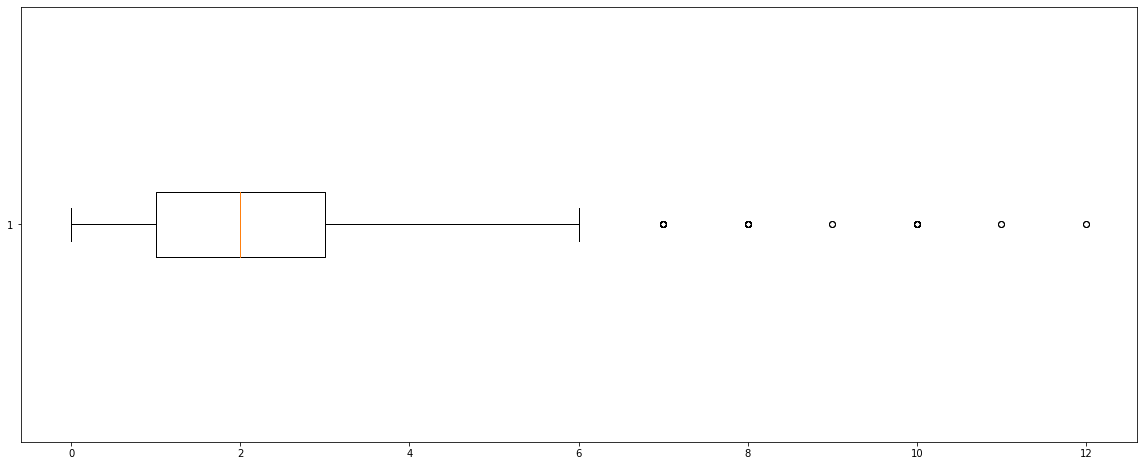

In [22]:
### Visualiser la distribution
# noter les valeurs extrêmes
fig = plt.figure(figsize=[20,8])
plt.boxplot(ht, vert=False)
plt.draw()

In [23]:
### Valeurs extrêmes
# La médiane + trois fois l'écart type
ext_h = ht[ht > ht.median() + ht.std()*3]
len(ext_h), ext_h.sort_values()

(31,
 id
 1002     8.0
 1815     8.0
 1644     8.0
 1575     8.0
 1844     8.0
 959      8.0
 950      8.0
 768      8.0
 1870     8.0
 170      8.0
 381      8.0
 348      8.0
 315      8.0
 1200     9.0
 190      9.0
 421     10.0
 1727    10.0
 1685    10.0
 1684    10.0
 1621    10.0
 236     10.0
 100     10.0
 1213    10.0
 1075    10.0
 841     10.0
 426     10.0
 1538    10.0
 1761    11.0
 1324    11.0
 391     12.0
 288     12.0
 Name: heures.tv, dtype: float64)

In [24]:
### Les individus concernés
obs_not_na[obs_not_na['heures.tv'] > 7].sort_values('heures.tv', ascending=False).head()


,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
288,72,Femme,"A arrete ses etudes, avant la derniere annee d...",7111.843263,Autre inactif,Autre,3,Oui,Rejet,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,12.0
391,58,Femme,Derniere annee d'etudes primaires,1345.963626,Autre inactif,Employe,3,Oui,Pratiquant occasionnel,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,12.0
1324,40,Homme,1er cycle,2257.927938,Chomeur,Ouvrier specialise,8,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Oui,11.0
1761,34,Femme,Enseignement technique ou professionnel court,3210.847528,Au foyer,NaN,7,Ne sait pas,Rejet,NaN,NaN,Non,Non,Oui,Oui,Non,Oui,Non,11.0
100,19,Femme,NaN,2186.540413,Exerce une profession,Employe,0,Oui,Appartenance sans pratique,Moins important que le reste,Equilibre,Non,Non,Non,Oui,Oui,Oui,Non,10.0


In [25]:
### Regardent très peu
obs_not_na[obs_not_na['heures.tv'] > 0].sort_values('heures.tv').head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
1202,49,Homme,Enseignement superieur y compris technique sup...,1867.243120,Exerce une profession,Cadre,2,Oui,Pratiquant regulier,Aussi important que le reste,Satisfaction,Non,Non,Non,Non,Oui,Oui,Oui,0.1
594,31,Femme,Enseignement superieur y compris technique sup...,6000.958111,Exerce une profession,Profession intermediaire,0,Oui,Ni croyance ni appartenance,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Non,Non,Non,0.1
596,32,Homme,Enseignement superieur y compris technique sup...,7024.979423,Exerce une profession,Cadre,6,Non,Pratiquant regulier,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,0.1
1377,19,Homme,NaN,7514.212962,"Etudiant, eleve",NaN,2,Non,Pratiquant occasionnel,NaN,NaN,Non,Non,Non,Oui,Non,Oui,Oui,0.1
895,54,Homme,Derniere annee d'etudes primaires,3018.579430,Exerce une profession,Ouvrier qualifie,5,Non,Pratiquant occasionnel,Moins important que le reste,Satisfaction,Non,Non,Non,Non,Oui,Non,Non,0.1


In [26]:
### Ne regardent jamais
tv_0 = obs_not_na[obs_not_na['heures.tv'] == 0]
print(len(tv_0))
tv_0.sort_values('heures.tv').head()

239


,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0
1168,31,Femme,2eme cycle,10213.329186,Exerce une profession,Employe,1,Oui,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Non,Non,Oui,Oui,0.0
1176,31,Homme,2eme cycle,6819.194372,Exerce une profession,Cadre,2,Non,Rejet,Aussi important que le reste,Equilibre,Non,Non,Oui,Non,Oui,Non,Non,0.0
1179,61,Femme,Enseignement technique ou professionnel court,9733.986556,Retraite,NaN,3,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,0.0
1181,40,Femme,2eme cycle,1112.235368,Exerce une profession,NaN,2,Oui,Rejet,Moins important que le reste,Equilibre,Non,Non,Non,Oui,Non,Non,Oui,0.0


## Analyse des âges

Variable quantitative continue

In [27]:
### On crée un variable qui contient seulement la colonne
#  c'est-à-dire une pandas.Series, la série ou liste de données 'âge'
age = obs['age']
s_age = age.sort_values() 
type(age), age.head()

(pandas.core.series.Series,
 id
 1    28
 2    23
 3    59
 4    34
 5    71
 Name: age, dtype: int64)

In [28]:
### Cette méthode d'une série fournit les indicateurs
#  de tendance centrale et de dispersion
age.describe()

count    2000.000000
mean       48.157000
std        16.941808
min        18.000000
25%        35.000000
50%        48.000000
75%        60.000000
max        97.000000
Name: age, dtype: float64

In [29]:
### La valeur la plus fréquente
age.mode()[0]

48

In [31]:
### À quel effectif correspond-elle ?
len(age[age == 48])

54

(18.0, 97.0)

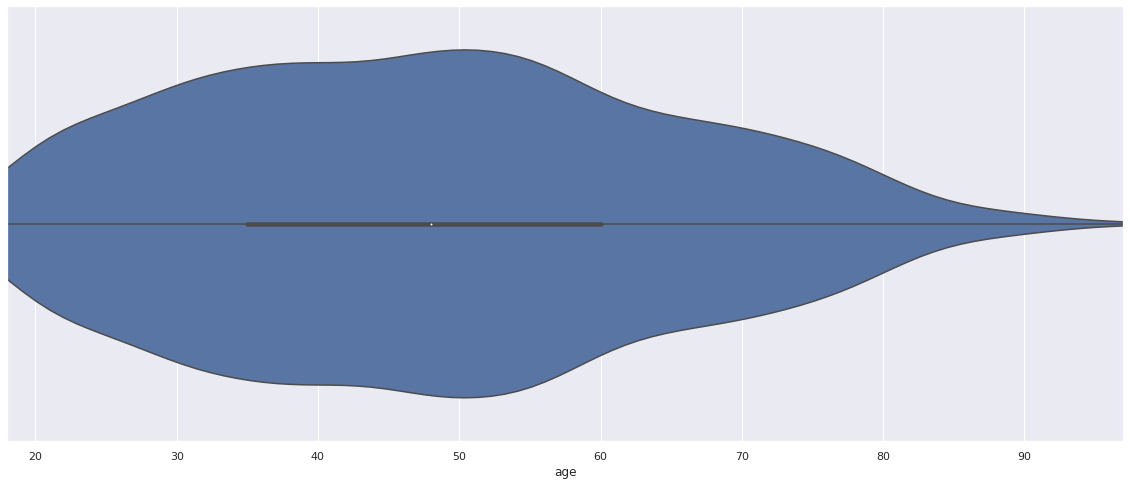

In [32]:
### Violinplot : rend visible la différente densité de la distribution
# https://mode.com/blog/violin-plot-examples/

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = obs["age"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [33]:
### Regrouper par âge et compter les individus par valeur
cs_age = s_age.groupby(s_age).count()
### Transformer la serie en dataFram
df_cs_age = pd.DataFrame(cs_age)
df_cs_age.columns= ['effectif']
print(type(df_cs_age))
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,effectif
age,
18,17
19,31
20,24
21,18
22,26


In [35]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
### Ajouter la fréquence cumulée
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,frequence,effectif_cumule,frequence_cumulee
age,,,,
18,17,0.85,17,0.85
19,31,1.55,48,2.40
20,24,1.20,72,3.60
21,18,0.90,90,4.50
22,26,1.30,116,5.80


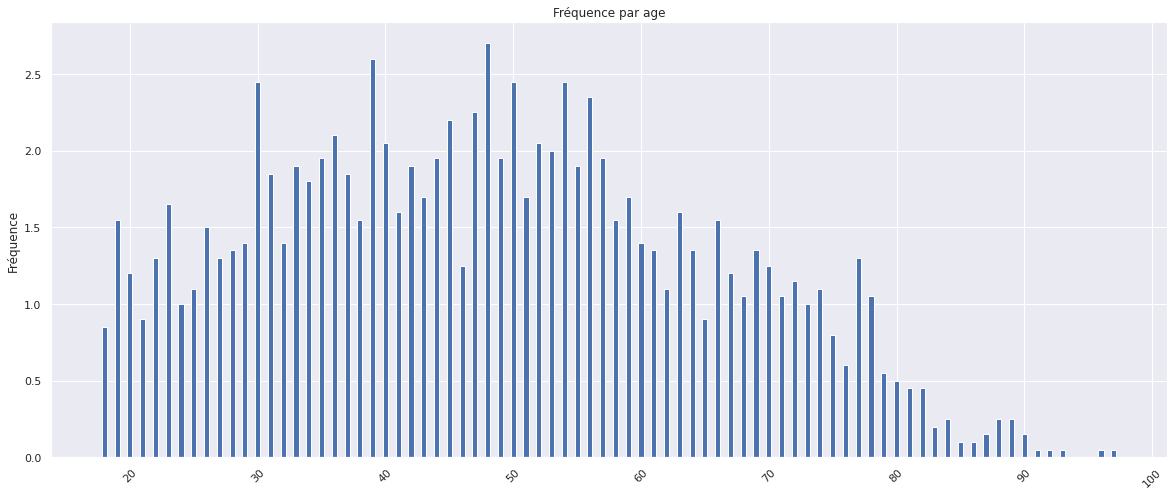

In [36]:
# Fréquences par age

objects = df_cs_age.index
eff = df_cs_age['frequence']

p1 = plt.bar(objects, eff, width=0.4)

plt.ylabel('Fréquence')
plt.title('Fréquence par age')
plt.gcf().set_size_inches(20, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


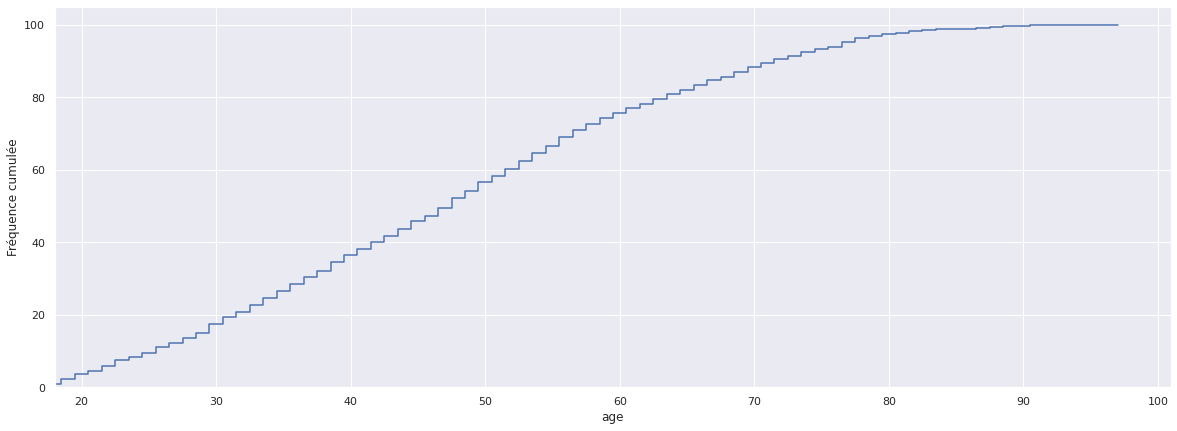

In [37]:
### Diagramme cumulatif : fréquences cumulées
#  On observe que la médiane est autour de 45 ans,
#  i.e. que la moitié de la population a moins de 45 ans, le reste plus 
f, ax = plt.subplots()
plt.ylabel('Fréquence cumulée')
df_cs_age['frequence_cumulee'].plot(figsize=(20,7), drawstyle='steps-mid') #  style='o--',  # autre valeur: steps-post, steps

### Changer les valeurs par défaut du début de la ligne
# Commenter les deux prochaines lignes et observer la différence
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=18)

plt.draw()

In [38]:
### comme il y a 54 individus qui ont la valeur médiane, i.e. 48 ans, la fréquence cumulée de cette valeur est supérieure à 50%
df_cs_age[df_cs_age['frequence_cumulee'] < 53].sort_values('frequence_cumulee', ascending=False).head()

,effectif,frequence,effectif_cumule,frequence_cumulee
age,,,,
48,54,2.70,1043,52.15
47,45,2.25,989,49.45
46,25,1.25,944,47.20
45,44,2.20,919,45.95
44,39,1.95,875,43.75


In [39]:
### Pour effectif pair la médiane est la moyenne de la valeur des individus 1000 et 1001, 
# 48 dans ce cas 
df_cs_age['frequence_cumulee'].max(), len(obs)

(100.0, 2000)

### Histogramme

In [44]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv,generation
id,,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0,"[26, 36)"
2,23,Femme,NaN,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0,"[18, 26)"
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0,"[56, 66)"
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0,"[26, 36)"
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0,"[66, 91)"


In [45]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs[['age', 'generation']].head()

,age,generation
id,,
1,28,26-35
2,23,18-25
3,59,56-65
4,34,26-35
5,71,66-90


In [46]:
### Alternative : regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
gb_generation = pd.DataFrame(c_obs.groupby('generation').size())
gb_generation.columns = ['effectif']
gb_generation

,effectif
generation,
18-25,191
26-35,338
36-45,390
46-55,414
56-65,305
66-90,357


In [47]:
gb_generation = gb_generation.reset_index()
gb_generation

,generation,effectif
0,18-25,191
1,26-35,338
2,36-45,390
3,46-55,414
4,56-65,305
5,66-90,357


In [48]:
### L'histogramme est basé sur la densité de différentes tranches
#  Cette fonction calcule la densité des tranches
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [49]:
### Séparer et préparer les différentes valeurs
gb_generation['frequence'] = (gb_generation['effectif'] \
                                   / gb_generation['effectif'].sum()).round(4)
gb_generation['densité'] = gb_generation.apply(calculer_densite, axis=1)
gb_generation['start'] = gb_generation.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
gb_generation['width'] = gb_generation.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
gb_generation

,generation,effectif,frequence,densité,start,width
0,18-25,191,0.0957,0.0137,18,7
1,26-35,338,0.1694,0.0188,26,9
2,36-45,390,0.1955,0.0217,36,9
3,46-55,414,0.2075,0.0231,46,9
4,56-65,305,0.1529,0.0170,56,9
5,66-90,357,0.1789,0.0075,66,24


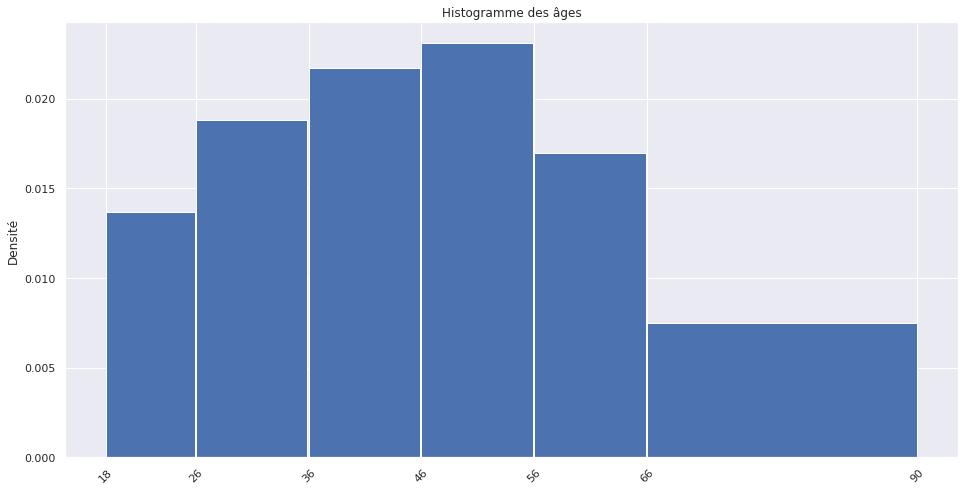

In [50]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale
fig,ax = plt.subplots(1,1)

objects = [l for l in gb_generation['start']]
eff = [l for l in gb_generation['densité']]
width = [l+0.9 if l < 10 else l for l in gb_generation['width']]

p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks([18, 26, 36, 46, 56, 66, 90])
plt.ylabel('Densité')
plt.title('Histogramme des âges')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Pyramide des âges

In [52]:
### Créer les classes pour les âges
# séparation par lustres
i = 1
age_classes = []
while i < 101:
    age_classes.append([i, i+4])
    i += 5
age_classes[-1:], len(age_classes)

([[96, 100]], 20)

In [53]:
### Préparer la liste pour découper les valeurs en classes
cut_list = [l[0] for l in age_classes]
cut_list[:3]

[1, 6, 11]

In [54]:
### Découper en classes les hommes
age_cut_h = pd.Series(pd.cut(obs['age'][obs['sexe']=='Homme'],cut_list))
age_cut_h[:4]

id
3     (56, 61]
4     (31, 36]
8     (46, 51]
10    (26, 31]
Name: age, dtype: category
Categories (19, interval[int64, right]): [(1, 6] < (6, 11] < (11, 16] < (16, 21] ... (76, 81] < (81, 86] < (86, 91] < (91, 96]]

In [55]:
### Effectifs des hommes par classe
l_hommes = age_cut_h.groupby(age_cut_h).count()
print(len(l_hommes), '\n'*2,l_hommes)

19 

 age
(1, 6]       0
(6, 11]      0
(11, 16]     0
(16, 21]    49
(21, 26]    53
(26, 31]    78
(31, 36]    80
(36, 41]    75
(41, 46]    82
(46, 51]    93
(51, 56]    98
(56, 61]    84
(61, 66]    65
(66, 71]    53
(71, 76]    42
(76, 81]    33
(81, 86]     6
(86, 91]     7
(91, 96]     1
Name: age, dtype: int64


In [56]:
### Découper les femmes par classe
age_cut_f = pd.Series(pd.cut(obs['age'][obs['sexe']=='Femme'],cut_list))
age_cut_f[:4]

id
1    (26, 31]
2    (21, 26]
5    (66, 71]
6    (31, 36]
Name: age, dtype: category
Categories (19, interval[int64, right]): [(1, 6] < (6, 11] < (11, 16] < (16, 21] ... (76, 81] < (81, 86] < (86, 91] < (91, 96]]

In [57]:
### Compter les femmes par classe
l_femmes = age_cut_f.groupby(age_cut_f).count()
print(len(l_femmes), '\n'*2,l_femmes)

19 

 age
(1, 6]        0
(6, 11]       0
(11, 16]      0
(16, 21]     41
(21, 26]     78
(26, 31]     89
(31, 36]    103
(36, 41]    118
(41, 46]     98
(46, 51]    128
(51, 56]    117
(56, 61]     75
(61, 66]     65
(66, 71]     65
(71, 76]     51
(76, 81]     44
(81, 86]     16
(86, 91]     10
(91, 96]      2
Name: age, dtype: int64


In [58]:
### Améliorer l'affichage des classes d'age
age_classes_str = [m.replace('[','').replace(']','') for m in map(str,age_classes[:-1])]
age_classes_str[:4]

['1, 5', '6, 10', '11, 15', '16, 20']

In [59]:
###  Créer le tableau des effectifs par classe, hommes et femmes
df = pd.DataFrame({'Age': age_classes_str, 
                    'Femmes': list(l_femmes), 
                    'Hommes': [e * -1 for e in list(l_hommes)]})
df

,Age,Femmes,Hommes
0,"1, 5",0,0
1,"6, 10",0,0
2,"11, 15",0,0
3,"16, 20",41,-49
4,"21, 25",78,-53
5,"26, 30",89,-78
6,"31, 35",103,-80
7,"36, 40",118,-75
8,"41, 45",98,-82
9,"46, 50",128,-93


In [60]:
### Créer la liste inversée des ages, des plus âgés aux plus jeunes
age_classes_str.reverse()
age_classes_str_rev = copy.deepcopy(age_classes_str)
age_classes_str.reverse()
age_classes_str_rev[:4], age_classes_str[:4]

(['91, 95', '86, 90', '81, 85', '76, 80'],
 ['1, 5', '6, 10', '11, 15', '16, 20'])

[]

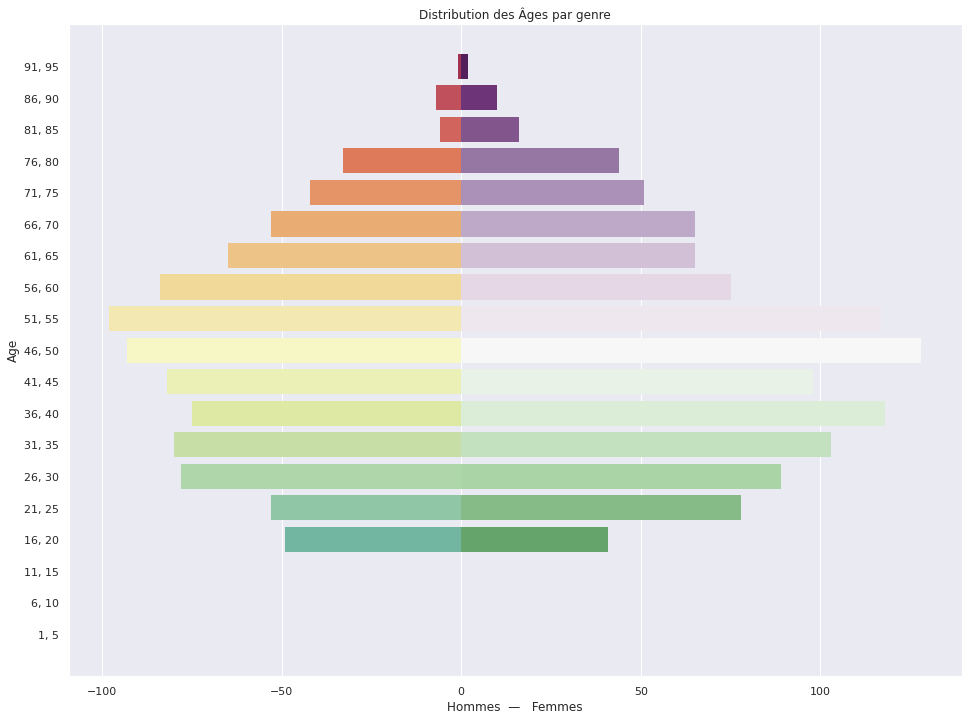

In [61]:
### Afficher la pyramide des âges
# https://towardsdatascience.com/different-bar-charts-in-python-6d984b9c6b17

# Prepare Data
plt.rcParams["figure.figsize"] = (16, 12)

#Créer le paramètre de tri,  des plus âgés aux plus jeunes
AgeClass = age_classes_str_rev
#Chart
bar_plot = sns.barplot(x='Hommes', y='Age', data=df, order=AgeClass, lw=0, palette="Spectral")
bar_plot = sns.barplot(x='Femmes', y='Age', data=df, order=AgeClass, lw=0, palette="PRGn")
plt.title("Distribution des Âges par genre", fontsize=12)
plt.xlabel("Hommes  —   Femmes")
plt.savefig('graphics/pyramid_genre_age.jpg')
plt.plot()


## Analyse des fratries

Variable quantitative discrète

In [54]:
obs['freres.soeurs'].head()

id
1    8
2    2
3    2
4    1
5    0
Name: freres.soeurs, dtype: int64

In [62]:
### Regrouper et compter les individus par valeur
frat = pd.DataFrame(obs.groupby(by='freres.soeurs').size(), columns=['effectif'])
frat.index.rename('f_s', inplace=True)
frat.head(), frat.tail()

(     effectif
 f_s          
 0         167
 1         407
 2         427
 3         284
 4         210,
      effectif
 f_s          
 14          4
 15          4
 16          1
 18          2
 22          1)

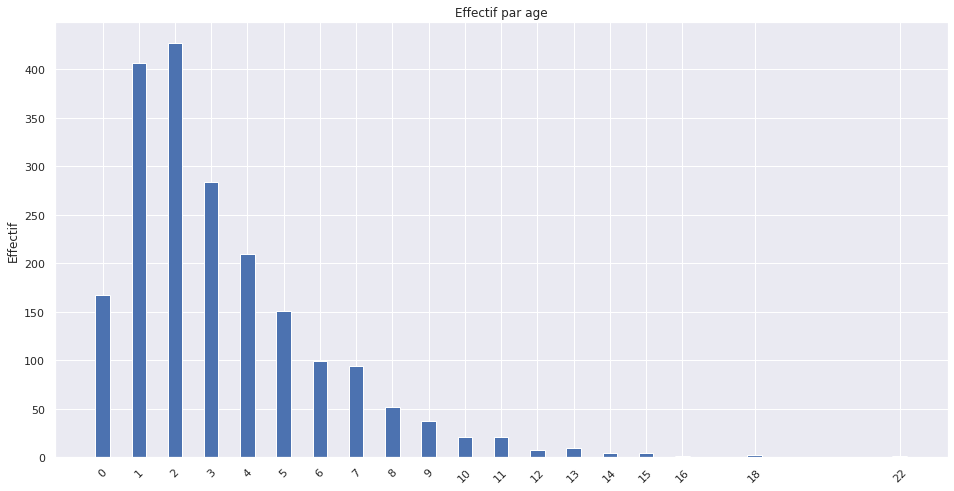

In [63]:
# Distribution des effectifs par fratrie

objects = frat.index
eff = frat['effectif']

p1 = plt.bar(objects, eff, width=0.4)

plt.xticks(frat.index)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [57]:
print(len(obs[obs['freres.soeurs'] > 10]))
obs[obs['freres.soeurs'] > 10].sort_values(by=['freres.soeurs'], ascending=False).head()

51


,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
1603,34,Femme,1er cycle,1050.284182,Exerce une profession,Employe,22,Oui,Ni croyance ni appartenance,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Non,Oui,Non,2.0
1011,57,Femme,Derniere annee d'etudes primaires,4698.347793,Au foyer,Ouvrier specialise,18,Non,Appartenance sans pratique,NaN,NaN,Non,Non,Non,Oui,Non,Non,Non,0.0
185,50,Homme,"A arrete ses etudes, avant la derniere annee d...",7739.151530,Exerce une profession,Ouvrier qualifie,18,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Non,Non,Non,Non,6.0
981,61,Homme,Enseignement superieur y compris technique sup...,3298.267550,Retraite,Profession intermediaire,16,Non,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,0.6
557,46,Homme,Enseignement superieur y compris technique sup...,1081.599743,Chomeur,NaN,15,Oui,Rejet,NaN,NaN,Non,Non,Non,Oui,Non,Non,Non,2.0


# Exploration de variables qualitatives

## Qualification

In [78]:
### Méthode permettant de savoir combien de valeurs vides on a
obs['qualif'].isnull().values.sum()

347

In [79]:
### Distribution, i.e. effectif par valeur
# Généralement non utile pour variable quantitative continue mais ici
# on utilise pour inspecter diversité valeurs
vc = obs['qualif'].value_counts()
len(vc), type(vc)

(7, pandas.core.series.Series)

In [80]:
df_vc = pd.DataFrame(vc).reset_index()
df_vc.columns=['qualif','effectif']
df_vc

,qualif,effectif
0,Employe,594
1,Ouvrier qualifie,292
2,Cadre,260
3,Ouvrier specialise,203
4,Profession intermediaire,160
5,Technicien,86
6,Autre,58


In [81]:
### Somme des effectifs du tableau précédent
df_vc.effectif.sum()

1653

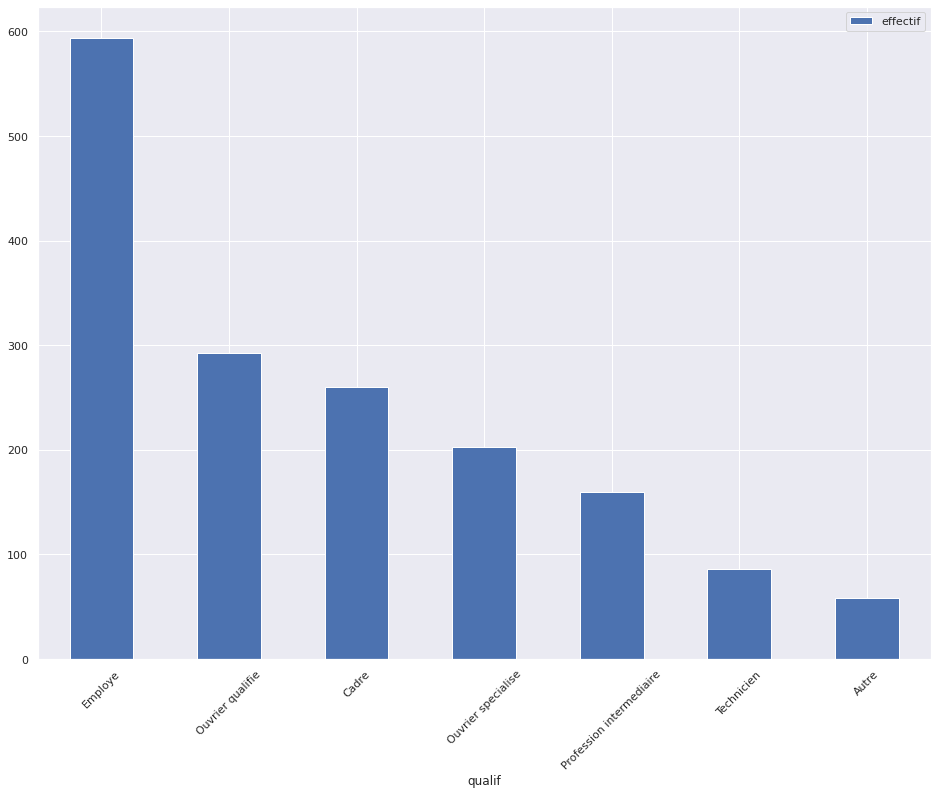

In [82]:
ax = df_vc.plot.bar(x='qualif', y='effectif', rot = 45)

In [83]:
### Distribution, i.e. effectif par valeur
# Généralement non utile pour variable quantitative continue mais ici
# on utilise pour inspecter diversité valeurs
vch = obs[obs['sexe']=='Homme']['qualif'].value_counts().sort_index()
vch

Autre                        21
Cadre                       145
Employe                      96
Ouvrier qualifie            229
Ouvrier specialise           96
Profession intermediaire     88
Technicien                   66
Name: qualif, dtype: int64

In [73]:
df_vch = pd.DataFrame(vch)
df_vch.columns=['eff']

In [74]:
df_vchf = df_vch.join(vcf)
df_vchf

,eff,qualif
Autre,21,37
Cadre,145,115
Employe,96,498
Ouvrier qualifie,229,63
Ouvrier specialise,96,107
Profession intermediaire,88,72
Technicien,66,20


In [75]:
df_vchf.columns=['hommes','femmes']
df_vchf

,hommes,femmes
Autre,21,37
Cadre,145,115
Employe,96,498
Ouvrier qualifie,229,63
Ouvrier specialise,96,107
Profession intermediaire,88,72
Technicien,66,20


[]

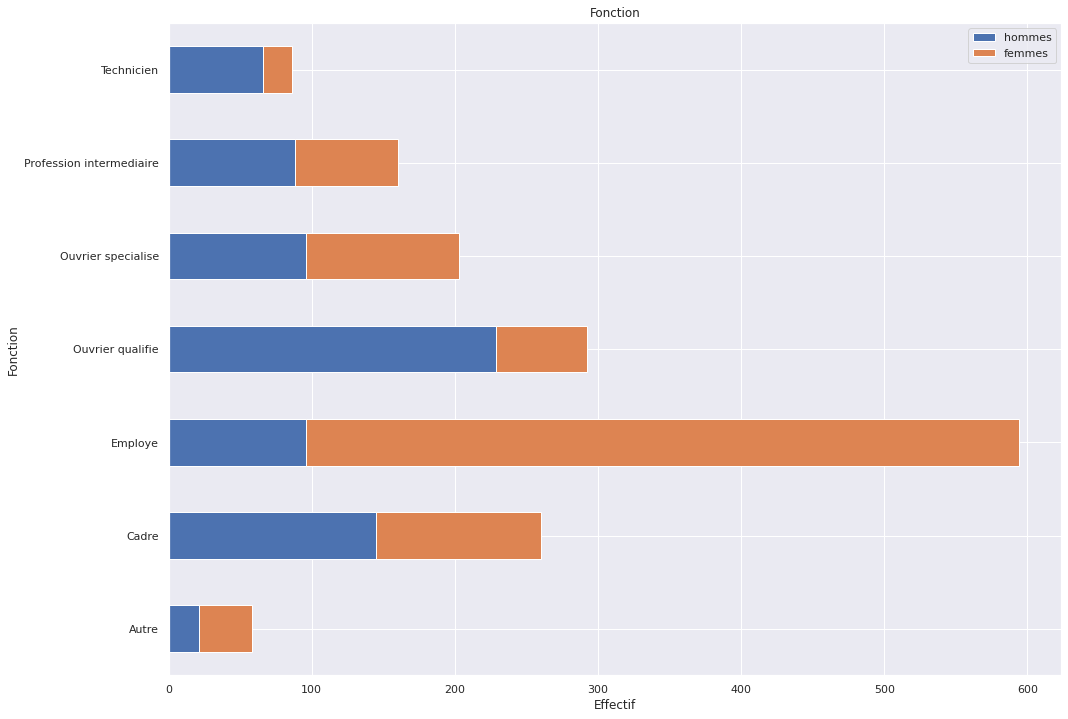

In [76]:
ax = df_vchf.plot.barh(stacked=True, title='Fonction')
ax.set_xlabel("Effectif")
ax.set_ylabel("Fonction")
ax.plot()

## Activité

In [88]:
### Méthode permettant de savoir combien de valeurs vides on a
obs['occup'].isnull().values.sum()

0

In [99]:
### Distribution, i.e. effectif par valeur
# Généralement non utile pour variable quantitative continue mais ici
# on utilise pour inspecter diversité valeurs
vch = obs[obs['sexe']=='Homme']['occup'].value_counts().sort_index()
vch.sum(), vch

(899,
 Autre inactif             30
 Chomeur                   54
 Etudiant, eleve           48
 Exerce une profession    520
 Retire des affaires       39
 Retraite                 208
 Name: occup, dtype: int64)

In [100]:
### Distribution, i.e. effectif par valeur
# Généralement non utile pour variable quantitative continue mais ici
# on utilise pour inspecter diversité valeurs
vcf = obs[obs['sexe']=='Femme']['occup'].value_counts().sort_index()
vcf.sum(), vcf

(1101,
 Au foyer                 171
 Autre inactif             53
 Chomeur                   80
 Etudiant, eleve           46
 Exerce une profession    529
 Retire des affaires       38
 Retraite                 184
 Name: occup, dtype: int64)

In [103]:
### Commencer par les femmes car elles ont une ligne de plus
df_vcf = pd.DataFrame(vcf)
df_vcf.columns=['effectif']
df_vcf

,effectif
Au foyer,171
Autre inactif,53
Chomeur,80
"Etudiant, eleve",46
Exerce une profession,529
Retire des affaires,38
Retraite,184


In [108]:
df_vchf = df_vcf.join(vch).fillna(0)
df_vchf

,effectif,occup
Au foyer,171,0.0
Autre inactif,53,30.0
Chomeur,80,54.0
"Etudiant, eleve",46,48.0
Exerce une profession,529,520.0
Retire des affaires,38,39.0
Retraite,184,208.0


In [110]:
df_vchf.columns=['femmes','hommes']
df_vchf

,femmes,hommes
Au foyer,171,0.0
Autre inactif,53,30.0
Chomeur,80,54.0
"Etudiant, eleve",46,48.0
Exerce une profession,529,520.0
Retire des affaires,38,39.0
Retraite,184,208.0


In [113]:
### Somme des effectifs du tableau précédent
df_vchf.hommes.sum() + df_vchf.femmes.sum(), len(obs)

(2000.0, 2000)

In [111]:
### Somme des effectifs du tableau précédent
df_vchf['hommes'].sum() + df_vchf['femmes'].sum(), len(obs)

(2000.0, 2000)

In [112]:
len(obs[obs['sexe']=='Homme']), len(obs[obs['sexe']=='Femme'])

(899, 1101)

[]

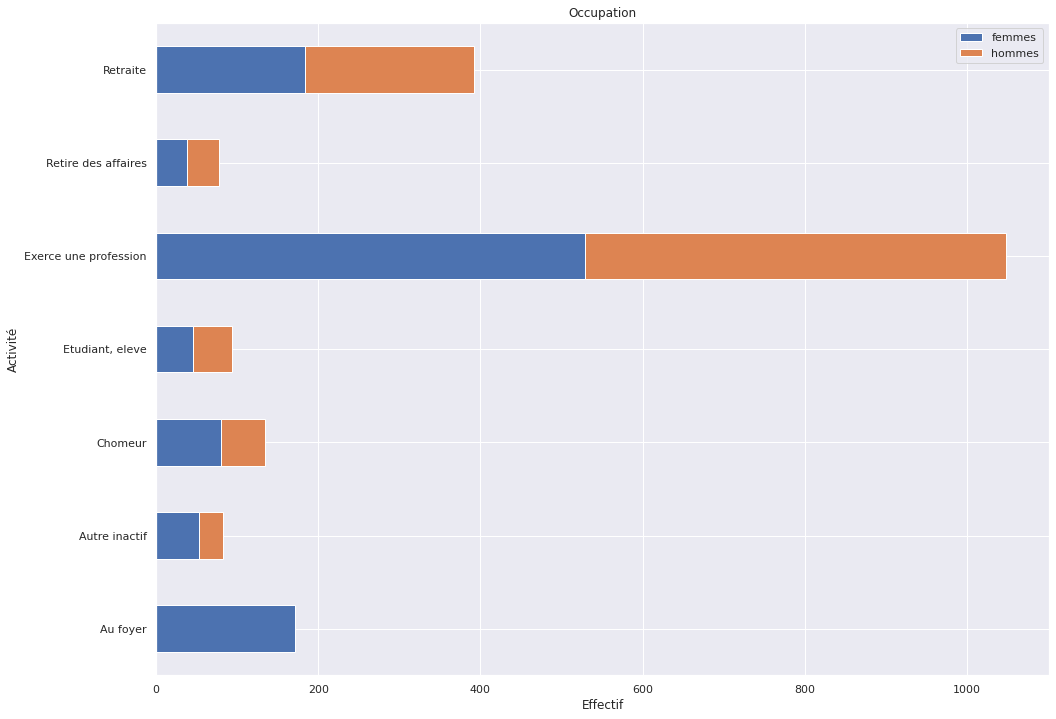

In [114]:
ax = df_vchf.plot.barh(stacked=True, title='Occupation')
ax.set_xlabel("Effectif")
ax.set_ylabel("Activité")
ax.plot()